In [12]:
import numpy as np
import pandas as pd

# @nekrald: This will make simulation reproducible.
import random
random.seed(7)
np.random.seed(7)

In [13]:
# define number of simulation in below

MONTHS_IN_YEAR = 12
HUNDRED_PERCENTS = 100

COUNT = 100
MIN_WORKERS = 20
MAX_WORKERS = 500
MAX_JOB_DRIFT_PERCENT = 5


construction_size = np.empty([COUNT, MONTHS_IN_YEAR])
construction_size[:,0] = np.random.randint(MIN_WORKERS, MAX_WORKERS, COUNT)
# assume month over month change of construction workers per site is less than MAX_JOB_DRIFT %.
for idx_sample in range(COUNT):
    for idx_month in range(MONTHS_IN_YEAR - 1):
        change_ratio=np.random.randint(-MAX_JOB_DRIFT_PERCENT, MAX_JOB_DRIFT_PERCENT) / HUNDRED_PERCENTS
        construction_size[idx_sample,idx_month + 1]= round(construction_size[idx_sample,idx_month] * (1 + change_ratio),0)
        
construction_size = pd.DataFrame(
    construction_size, 
    columns=['construction_size_month_{}'.format(idx) for idx in range(1, MONTHS_IN_YEAR + 1)])

construction_size.head()


,construction_size_month_1,construction_size_month_2,construction_size_month_3,construction_size_month_4,construction_size_month_5,construction_size_month_6,construction_size_month_7,construction_size_month_8,construction_size_month_9,construction_size_month_10,construction_size_month_11,construction_size_month_12
0,195.0,191.0,181.0,188.0,196.0,192.0,190.0,190.0,186.0,177.0,175.0,180.0
1,216.0,218.0,222.0,215.0,219.0,215.0,221.0,223.0,225.0,225.0,227.0,227.0
2,45.0,46.0,44.0,44.0,44.0,44.0,46.0,48.0,46.0,46.0,45.0,45.0
3,87.0,90.0,87.0,86.0,83.0,84.0,81.0,81.0,78.0,79.0,82.0,84.0
4,231.0,233.0,233.0,242.0,247.0,247.0,245.0,255.0,258.0,266.0,255.0,255.0


In [14]:
#Generate average (non-)compliance ratio using normal distribution per construction site
noncompliance_ratio = np.random.normal(loc=8, scale=4.0, size=COUNT)
noncompliance_ratio[noncompliance_ratio < 0] = 0

#Calculate expected noncompliance population per construction site
NONCOMPLIANCE_DECAY = 0.96 # Because 0.98**12 = 0.78, assume that less noncompliance with time.

expected_noncompliance=np.empty([COUNT, MONTHS_IN_YEAR])
for idx_sample in range(COUNT):
    for idx_month in range(MONTHS_IN_YEAR):
        decay = NONCOMPLIANCE_DECAY ** idx_month
        expected_noncompliance[idx_sample, idx_month]=round(
            decay * construction_size.iloc[idx_sample, idx_month] * noncompliance_ratio[idx_sample] / HUNDRED_PERCENTS, 0)


noncompliance_ratio = pd.DataFrame(noncompliance_ratio, columns=['noncompliance_percent'])

# TODO(@nekrald): noncompliance decay

In [15]:
#Generate noncompliance population per each company for 12 months
noncompliance_random = np.random.poisson(expected_noncompliance)

noncompliance_random = pd.DataFrame(noncompliance_random, columns=[
    'noncompliance_month_{}'.format(idx) for idx in range(1, MONTHS_IN_YEAR + 1)
    ])
noncompliance_random.head()

,noncompliance_month_1,noncompliance_month_2,noncompliance_month_3,noncompliance_month_4,noncompliance_month_5,noncompliance_month_6,noncompliance_month_7,noncompliance_month_8,noncompliance_month_9,noncompliance_month_10,noncompliance_month_11,noncompliance_month_12
0,8,13,12,12,10,4,4,7,8,6,7,5
1,19,9,14,10,7,13,6,11,13,10,8,12
2,6,11,7,4,1,1,5,5,2,4,4,1
3,7,5,4,5,7,10,5,6,1,3,3,4
4,12,13,15,21,19,16,19,13,27,17,19,18


In [16]:
#Assuming 3% claim rate, generate normal random around mean =  2% * possion random generated number
MEAN_CLAIM_RATE = 0.03
claims = np.empty([COUNT, MONTHS_IN_YEAR])

for idx_sample in range(COUNT):
    generated_list = []
    for idx_month in range(MONTHS_IN_YEAR):
        value = np.random.poisson(MEAN_CLAIM_RATE * noncompliance_random.iloc[idx_sample,idx_month])
        generated_list.append(value)
    claims[idx_sample,] = generated_list

claims = pd.DataFrame(claims, columns=['claims_month_{}'.format(idx) for idx in range(1, MONTHS_IN_YEAR + 1)])
claims.head()

,claims_month_1,claims_month_2,claims_month_3,claims_month_4,claims_month_5,claims_month_6,claims_month_7,claims_month_8,claims_month_9,claims_month_10,claims_month_11,claims_month_12
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0


In [17]:
simulation = pd.concat([noncompliance_ratio, construction_size, noncompliance_random, claims], axis=1)
simulation.head()

,noncompliance_percent,construction_size_month_1,construction_size_month_2,construction_size_month_3,construction_size_month_4,construction_size_month_5,construction_size_month_6,construction_size_month_7,construction_size_month_8,construction_size_month_9,...,claims_month_3,claims_month_4,claims_month_5,claims_month_6,claims_month_7,claims_month_8,claims_month_9,claims_month_10,claims_month_11,claims_month_12
0,5.359881,195.0,191.0,181.0,188.0,196.0,192.0,190.0,190.0,186.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5.888185,216.0,218.0,222.0,215.0,219.0,215.0,221.0,223.0,225.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0
2,11.114537,45.0,46.0,44.0,44.0,44.0,44.0,46.0,48.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8.597711,87.0,90.0,87.0,86.0,83.0,84.0,81.0,81.0,78.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.071318,231.0,233.0,233.0,242.0,247.0,247.0,245.0,255.0,258.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0


In [18]:
# Average construction worker per month
average_construction_size = round(simulation.loc[: , "construction_size_month_1":"construction_size_month_12"].mean(axis=1))
simulation.insert(loc=0, column='average_construction_size_per_month', value=average_construction_size)

# Average non-compliance per month
average_detected_noncompliance = round(simulation.loc[: , "noncompliance_month_1":"noncompliance_month_12"].mean(axis=1))
simulation.insert(loc=1, column='average_noncompliance_detection_per_month', value=average_detected_noncompliance)

# Average claims per monthla
average_claims = round(simulation.loc[: , "claims_month_1":"claims_month_12"].mean(axis=1))
simulation.insert(loc=2, column='average_claims_per_month', value=average_claims)

# Average claim to noncomp ratio
average_ratio = simulation['average_claims_per_month']/simulation['average_noncompliance_detection_per_month']
simulation.insert(loc=3, column='average_claim_to_noncompliance_ratio', value=average_ratio)

In [23]:
simulation.head()
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   average_construction_size_per_month        100 non-null    float64
 1   average_noncompliance_detection_per_month  100 non-null    float64
 2   average_claims_per_month                   100 non-null    float64
 3   average_claim_to_noncompliance_ratio       98 non-null     float64
 4   noncompliance_percent                      100 non-null    float64
 5   construction_size_month_1                  100 non-null    float64
 6   construction_size_month_2                  100 non-null    float64
 7   construction_size_month_3                  100 non-null    float64
 8   construction_size_month_4                  100 non-null    float64
 9   construction_size_month_5                  100 non-null    float64
 10  construction_size_month_6  

In [20]:
simulation.to_csv('capstone_simulation.csv')

In [21]:
total_noncompliance_monthly = simulation.loc[: , "noncompliance_month_1":"noncompliance_month_12"].sum(axis=0).values

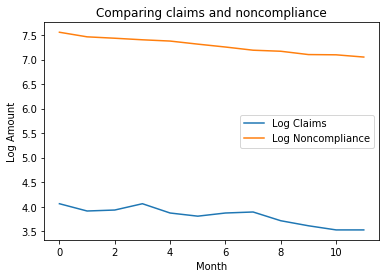

In [22]:
total_claims_monthly = simulation.loc[: , "claims_month_1":"claims_month_12"].sum(axis=0).values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(total_claims_monthly), label='Log Claims')
plt.plot(np.log(total_noncompliance_monthly), label='Log Noncompliance')
plt.xlabel("Month")
plt.ylabel("Log Amount")
plt.title("Comparing claims and noncompliance")
plt.legend()
plt.show()